In [1]:
# Reference: https://github.com/hakanmhmd/air-fare-scraper/blob/master/flight_price_scrape.ipynb

In [2]:
from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities

import requests
import bs4 as bs
import pandas as pd

In [3]:
# f = from this airport (ex. SFO)
# t = to this airport (ex. JFK)
# d = date of flight (ex. yyyy-mm-dd)
# tt = travel type (ex. o for one-way, m for multi-city)
# a = airline (ex. UA for United)
# s = # of stops (ex. 0 for nonstop)

google_flights_url = '''
https://www.google.com/flights/#search;f=SFO;t=EWR;d=2018-04-01;tt=o;a=UA;s=0
'''

# This should return <Response [200]>
requests.get(google_flights_url)

<Response [200]>

In [4]:
# Sources: 
# https://realpython.com/blog/python/headless-selenium-testing-with-python-and-phantomjs/
# https://coderwall.com/p/9jgaeq/set-phantomjs-user-agent-string

dcap = dict(DesiredCapabilities.PHANTOMJS)
dcap["phantomjs.page.settings.userAgent"] = (
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.94 Safari/537.36")

driver = webdriver.PhantomJS(desired_capabilities=dcap)
driver.get(google_flights_url)

In [7]:
# Read in source.content to beautifulsoup 
# beautifulsoup can parse (extract specific information) HTML code

soup = bs.BeautifulSoup(driver.page_source, 'lxml') 
# we pass in the source content and choose a parser

# features specifies what type of code we are parsing, 
# here 'lxml' specifies an HTML parser

<!DOCTYPE html>
<html lang="en-US"><head><link href="https://fonts.googleapis.com/css?family=Roboto:300,400,500,700" rel="stylesheet" type="text/css"/><style type="text/css">.gm-style .gm-style-cc span,.gm-style .gm-style-cc a,.gm-style .gm-style-mtc div{font-size:10px}
</style><style type="text/css">@media print {  .gm-style .gmnoprint, .gmnoprint {    display:none  }}@media screen {  .gm-style .gmnoscreen, .gmnoscreen {    display:none  }}</style><style type="text/css">.gm-style-pbc{transition:opacity ease-in-out;background-color:rgba(0,0,0,0.45);text-align:center}.gm-style-pbt{font-size:22px;color:white;font-family:Roboto,Arial,sans-serif;position:relative;margin:0;top:50%;-webkit-transform:translateY(-50%);-ms-transform:translateY(-50%);transform:translateY(-50%)}
</style><style>.LJV2HGB-eb-j{display:inline-block;padding:0 8px;margin:0;height:27px;min-width:54px;-webkit-box-sizing:content-box;-moz-box-sizing:content-box;box-sizing:content-box;font-size:11px;font-weight:bold;text-al
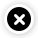
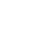
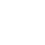
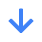
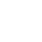
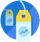

In [8]:
# If you click into the printed text and then CTRL+F "$2",
# you can see that it has the prices so the webscraping works
print(soup)